In [3]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

# The purpose of this notebook will be to calculate the overall rating of a player
# based on his individual skills, position and league.

In [4]:
fifa_df = pd.read_csv('data/fifa.csv')

In [5]:
# each row is a football player
# columns are attributes of a player
[(x, fifa_df[x].dtype) for x in fifa_df.columns]

[('ID', dtype('int64')),
 ('name', dtype('O')),
 ('full_name', dtype('O')),
 ('club', dtype('O')),
 ('club_logo', dtype('O')),
 ('special', dtype('int64')),
 ('age', dtype('int64')),
 ('league', dtype('O')),
 ('birth_date', dtype('O')),
 ('height_cm', dtype('float64')),
 ('weight_kg', dtype('float64')),
 ('body_type', dtype('O')),
 ('real_face', dtype('bool')),
 ('flag', dtype('O')),
 ('photo', dtype('O')),
 ('eur_value', dtype('float64')),
 ('eur_wage', dtype('float64')),
 ('eur_release_clause', dtype('float64')),
 ('overall', dtype('int64')),
 ('potential', dtype('int64')),
 ('pac', dtype('int64')),
 ('sho', dtype('int64')),
 ('pas', dtype('int64')),
 ('dri', dtype('int64')),
 ('def', dtype('int64')),
 ('phy', dtype('int64')),
 ('international_reputation', dtype('int64')),
 ('skill_moves', dtype('int64')),
 ('weak_foot', dtype('int64')),
 ('work_rate_att', dtype('O')),
 ('work_rate_def', dtype('O')),
 ('preferred_foot', dtype('O')),
 ('crossing', dtype('int64')),
 ('finishing', dtype

In [6]:
fifa_df.league.value_counts()

Argentinian Superliga            780
English Championship             717
English League One               668
English Premier League           654
Spanish Segunda División         637
English League Two               633
Italian Serie B                  625
USA Major League Soccer          625
Spanish Primera División         602
French Ligue 1                   598
Italian Serie A                  559
Colombian Primera A              552
French Ligue 2                   543
German Bundesliga                537
Japanese J1 League               519
Mexican Liga MX                  518
German 3. Liga                   515
German 2. Bundesliga             510
Portuguese Primeira Liga         509
Turkish Süper Lig                502
Holland Eredivisie               488
Russian Premier League           449
Belgian First Division A         436
Polish Ekstraklasa               418
Saudi Professional League        411
Norwegian Eliteserien            393
Swedish Allsvenskan              389
D

In [7]:
print(pd.DataFrame(fifa_df.work_rate_att.value_counts()))
print(pd.DataFrame(fifa_df.work_rate_def.value_counts()))
print(pd.DataFrame(fifa_df.preferred_foot.value_counts()))

        work_rate_att
Medium          12447
High             4645
Low               902
        work_rate_def
Medium          13560
High             2860
Low              1574
       preferred_foot
Right           13743
Left             4251


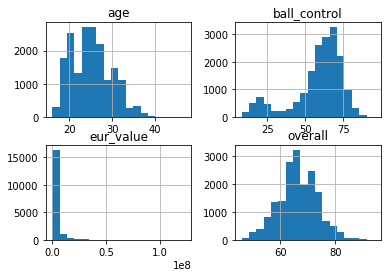

In [8]:
# the traits for every position and the player's preference will greatly incerease the chance 
# for matching exactly the overall rating I will remove them from the dataset to make it a little more challenging.
# Also the bonus traits of each player don't affect his overall rating much, so again I will remove them.
plt.figure(figsize=(12,12))
fifa_df[['overall', 'age', 'ball_control', 'eur_value']].hist(bins=18);

In [9]:
# remove the said features
skills = fifa_df.drop(fifa_df.columns[list(fifa_df.columns).index('rs'):], axis=1)

In [10]:
skills.dtypes[skills.dtypes != 'int64']
# features needing transformation:

name                   object
full_name              object
club                   object
club_logo              object
league                 object
birth_date             object
height_cm             float64
weight_kg             float64
body_type              object
real_face                bool
flag                   object
photo                  object
eur_value             float64
eur_wage              float64
eur_release_clause    float64
work_rate_att          object
work_rate_def          object
preferred_foot         object
dtype: object

In [11]:
# remove features that can't be used
skills = skills.drop(['ID','name', 'full_name', 'club', 'club_logo','real_face', 'flag', 'photo'], axis=1)

In [12]:
skills.dtypes[(skills.dtypes != 'int64') & (skills.dtypes != 'float64')]

league            object
birth_date        object
body_type         object
work_rate_att     object
work_rate_def     object
preferred_foot    object
dtype: object

In [13]:
# remove birth date because 'age', as feature, is enough for us
skills = skills.drop(['birth_date'], axis=1)

In [14]:
skills.loc[:,['league', 'body_type', 'preferred_foot', 'work_rate_att', 'work_rate_def']]

,league,body_type,preferred_foot,work_rate_att,work_rate_def
0,Spanish Primera División,C. Ronaldo,Right,High,Low
1,Spanish Primera División,Messi,Left,Medium,Medium
2,French Ligue 1,Neymar,Right,High,Medium
3,Spanish Primera División,Normal,Right,High,Medium
4,German Bundesliga,Normal,Right,Medium,Medium
5,German Bundesliga,Normal,Right,High,Medium
6,English Premier League,Lean,Right,Medium,Medium
7,English Premier League,Normal,Right,High,Medium
8,Spanish Primera División,Normal,Right,Medium,Medium
9,Italian Serie A,Normal,Right,High,Medium


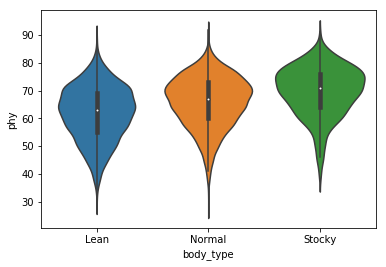

In [15]:
order_bt = ['Lean', 'Normal', 'Stocky']
sns.violinplot(x='body_type', y='phy', order=order_bt, data=skills);

In [16]:
# drop body_type since it has some player specific values 
# also it is in some way the same as the 'phy' attribute that refers to physical strength
skills = skills.drop(['body_type'], axis=1)

count    17994.000000
mean      1594.417306
std        271.587232
min        728.000000
25%       1450.250000
50%       1634.000000
75%       1785.000000
max       2291.000000
Name: special, dtype: float64

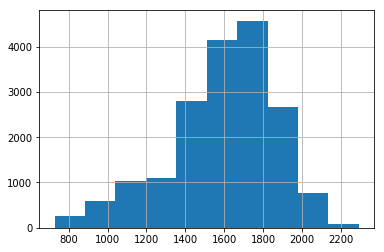

In [18]:
skills.special.hist();
skills.special.describe()

In [19]:
# drop special since I don't know what it is :)
skills = skills.drop(['special'], axis=1)

In [20]:
set(skills['work_rate_def']), set(skills['work_rate_att'])

({'High', 'Low', 'Medium'}, {'High', 'Low', 'Medium'})

In [21]:
# encode work_rates (no need to onehot encode them because they are incremental data)
skills['work_rate_att_encoded'] = skills.loc[:,'work_rate_att'].apply(lambda x: ['Low', 'Medium', 'High'].index(x))
skills['work_rate_def_encoded'] = skills.loc[:,'work_rate_def'].apply(lambda x: ['Low', 'Medium', 'High'].index(x))
skills = skills.drop(['work_rate_att','work_rate_def'], axis=1)

In [22]:
# features left to encode
set(skills.columns) - set(skills.describe().columns)

{'league', 'preferred_foot'}

In [23]:
print(set(skills.preferred_foot))
skills['preferred_foot_encoded'] = (skills.preferred_foot == 'Right').astype('float')
skills = skills.drop(['preferred_foot'], axis=1)

{'Left', 'Right'}


In [24]:
set(skills.columns) - set(skills.describe().columns)

{'league'}

In [25]:
# One-hot encode leagues and add them to the original df

# Label binarizer needs numerical data so we must encode leagues
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

# User list of leagues to encode each league by its index in the list
leagues = list(set(skills.league))
def transform_league(series_league):
    return series_league.apply(lambda x: leagues.index(x))

# Label Binarizer creates a column for each league
lb.fit(transform_league(skills.league))
leagues_df = pd.DataFrame(lb.transform(transform_league(skills.league)), columns=leagues)

# Concatenate the encoded leagues to the dataframe
skills = pd.concat([skills, leagues_df], axis=1)

In [26]:
# Droping the column with leagues as it is already encoded
skills = skills.drop([np.nan, 'league'], axis=1)

In [27]:
# Inspecting new league columns
skills.loc[:,list(skills.columns[list(skills.columns).index('preferred_foot_encoded'):])]

,preferred_foot_encoded,Austrian Bundesliga,Saudi Professional League,Spanish Primera División,Turkish Süper Lig,Swiss Super League,Korean K League Classic,Mexican Liga MX,Polish Ekstraklasa,Portuguese Primeira Liga,...,South African PSL,Rep. Ireland Premier Division,Colombian Primera A,English Premier League,Holland Eredivisie,Finnish Veikkausliiga,Swedish Allsvenskan,Norwegian Eliteserien,Argentinian Superliga,Japanese J1 League
0,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print(set(skills.columns) - set(skills.describe().columns))
skills.describe()
# No features to encode

set()


,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,...,South African PSL,Rep. Ireland Premier Division,Colombian Primera A,English Premier League,Holland Eredivisie,Finnish Veikkausliiga,Swedish Allsvenskan,Norwegian Eliteserien,Argentinian Superliga,Japanese J1 League
count,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,1.650000e+04,17994.000000,17994.000000,17994.000000,17994.000000,...,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000
mean,25.120151,181.271980,75.400856,2.370511e+06,11503.834612,4.449111e+06,66.253029,71.200400,67.739969,53.485217,...,0.003112,0.016005,0.030677,0.036345,0.027120,0.001501,0.021618,0.021841,0.043348,0.028843
std,4.617428,6.690392,6.994824,5.347250e+06,23050.661073,1.055955e+07,6.946729,6.082015,10.937646,13.833779,...,0.055701,0.125499,0.172446,0.187153,0.162438,0.038708,0.145438,0.146167,0.203644,0.167370
min,16.000000,155.000000,49.000000,0.000000e+00,0.000000,1.300000e+04,46.000000,46.000000,21.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,177.000000,70.000000,3.000000e+05,2000.000000,5.280000e+05,62.000000,67.000000,61.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,181.000000,75.000000,7.000000e+05,4000.000000,1.200000e+06,66.000000,71.000000,68.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,186.000000,80.000000,2.000000e+06,12000.000000,3.600000e+06,71.000000,75.000000,75.000000,64.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.000000,205.000000,110.000000,1.230000e+08,565000.000000,2.368000e+08,94.000000,94.000000,96.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Inspect dataframe for null values
skills.isnull().sum().sort_values()

age                                 0
Czech Liga                          0
Scottish Premiership                0
English Championship                0
German 3. Liga                      0
English League Two                  0
German 2. Bundesliga                0
Portuguese Primeira Liga            0
Polish Ekstraklasa                  0
Mexican Liga MX                     0
Ukrainian Premier League            0
Korean K League Classic             0
Turkish Süper Lig                   0
Spanish Primera División            0
Saudi Professional League           0
Austrian Bundesliga                 0
preferred_foot_encoded              0
work_rate_def_encoded               0
work_rate_att_encoded               0
gk_reflexes                         0
gk_positioning                      0
Swiss Super League                  0
gk_kicking                          0
Italian Serie B                     0
Campeonato Brasileiro Série A       0
Norwegian Eliteserien               0
Swedish Alls

In [32]:
# 'eur_release_clause' has too much null values, also not that important in calculating 'overall'
print(skills.eur_release_clause.isnull().sum())
skills = skills.drop(['eur_release_clause'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'eur_release_clause'

In [36]:
from sklearn.model_selection import train_test_split
stats = skills.drop(['overall'], axis=1)
overall = skills.overall

In [37]:
x_train, x_test, y_train, y_test = train_test_split(stats, overall, test_size=0.3, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
# Started with linear regression as baseline model
# because I supposed there is a linear equation for calculating overall rating
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
regressor.score(x_test, y_test)

0.93820777077784223

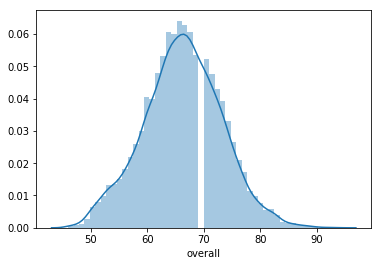

In [40]:
sns.distplot(overall)

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), stats, overall, cv=10)

In [76]:
from sklearn import linear_model
ls = linear_model.Lasso(alpha=0.0001, max_iter=10000)

In [77]:
ls.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
ls.score(x_test, y_test)

0.93823017661525288